# DotArray Object for a Triple Quantum Dot Array

This tutorial tests the dot maksing and effective parameter calculation on a 4-qubit system. 

See 2-qubit tutorial for more detailed explanations. 

Necessary imports and default plotting parameters:

In [1]:
import os
from pathlib import Path
path = Path(os.getcwd())

# update base working directory to QuDiPy
if path.stem != 'QuDiPy':
    base_dir = path.parents[1]
    os.chdir(base_dir)
else:
    base_dir = path

In [2]:
import numpy as np
from qudipy.system import DotArray

## 1. Generate Dots object instance

Define variables to initialize Dots object instance

In [3]:
nav_dir = os.path.join('QuDiPy data', 'tutorials')
processed_dir = os.path.join(base_dir, nav_dir,
                            'processed','3QD_processed')
nextnano_dir = os.path.join(base_dir, nav_dir,
                                    'nextnano','3QD')
n_dots = 3      # anticipated number of dots

If desired, define a subset of voltage ranges from the simulated nextnano data
set to calculate relevant effective parameters or load previously calculated 
interpolation objects.

In [4]:
pts = [4,3,4,3,4]
ctrl_vals = [ 
    np.linspace(0.2, 0.35, pts[0]),
    np.linspace(0.0, 0.15, pts[1]),
    np.linspace(0.2, 0.35, pts[2]),
    np.linspace(0.0, 0.15, pts[3]),
    np.linspace(0.2, 0.35, pts[4])]

Add a file prefix name to be appended to saved data or interpolation objects that will be computed.

In [5]:
file_prefix = 'tutorial'

Create DotArray object instance

In [6]:
# Calculate the effective parameters and/or load the masked potential 
# lanscapes as well as save 2D potential slices to Pre-processed directory
dots = DotArray(n_dots, ctrl_ranges=ctrl_vals)
dots.numeric(processed_dir, nextnano_dir, file_prefix)

Loading pre-calculated spin interpolators from
c:\QuDiPy\QuDiPy data\tutorials\processed\3QD_processed\tutorial_spin_data_size_[4 3 4 3 4]_from_[0.2 0.  0.2 0.  0.2]_to_[0.35 0.15 0.35 0.15 0.35].pkl


### 1.1 Dot Masking

Checking how individual dots and dot pairs are masked  (Gaussian splitting used by default)

In [7]:
# Choose voltage control values
voltage_config = [0.3, 0.0, 0.2, 0.05, 0.24]

dot1, dot2, dot3 = dots.split(group='single')
dotpair1, dotpair2 = dots.split(group='pair')

Simply plot the masked dot potential

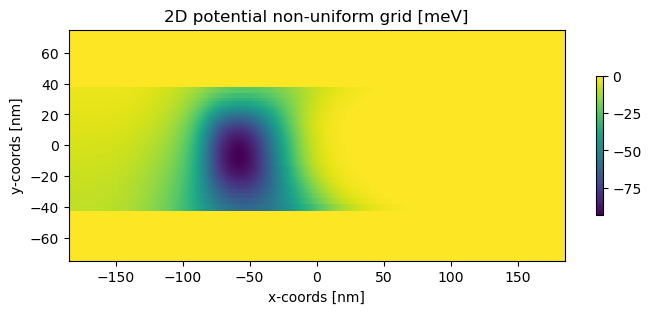

In [8]:
dot1.potential.plot(voltage_config, plot_units='meV')

Plot the masked potential with an overlay of the ground state wave function

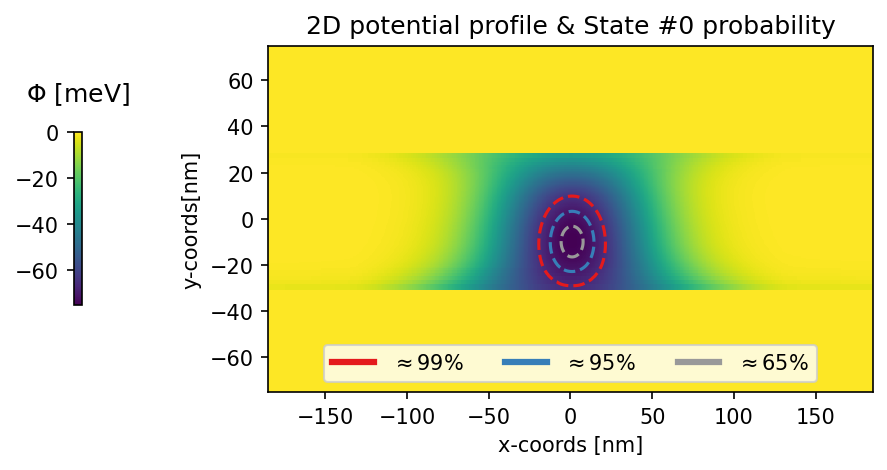

In [9]:
dot2.potential.plot(voltage_config, plot_units='meV', show_wf=True)

Plot the masked potential and a subplot figure of the ground state wavefunction

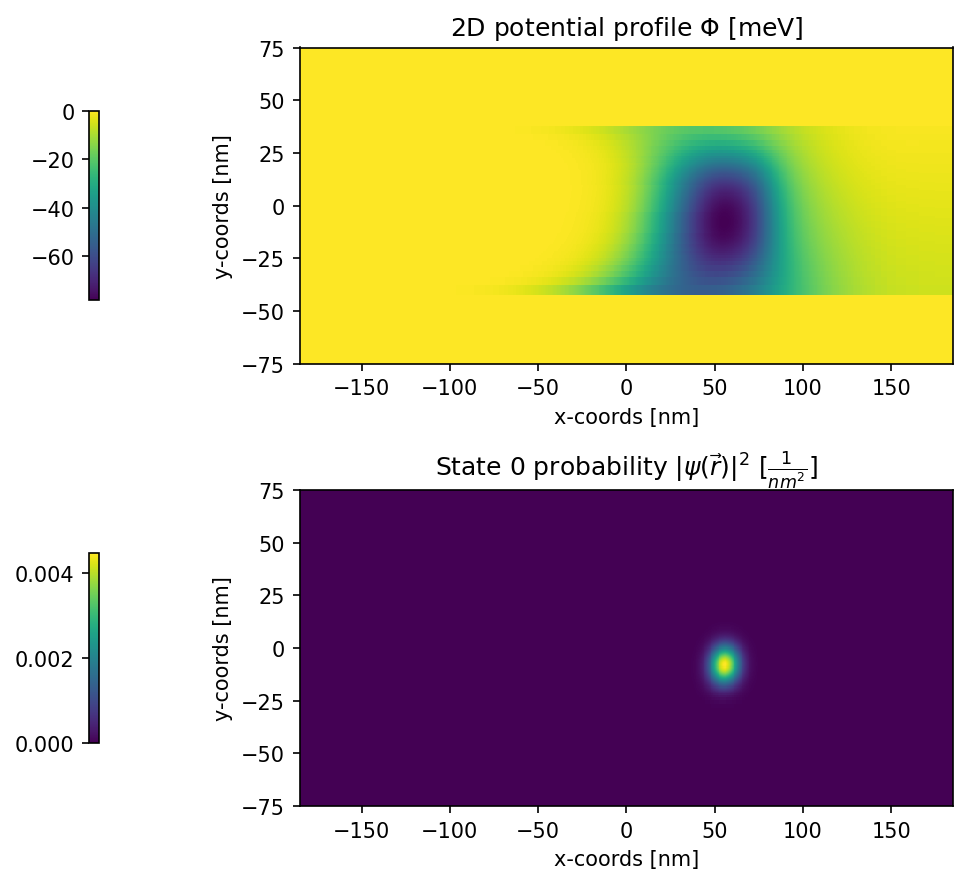

In [10]:
dot3.potential.plot(voltage_config, plot_units='meV', show_wf=True, overlay_ontop=False, figsize=(7,3))

The same can be performed for masked double dot potentials

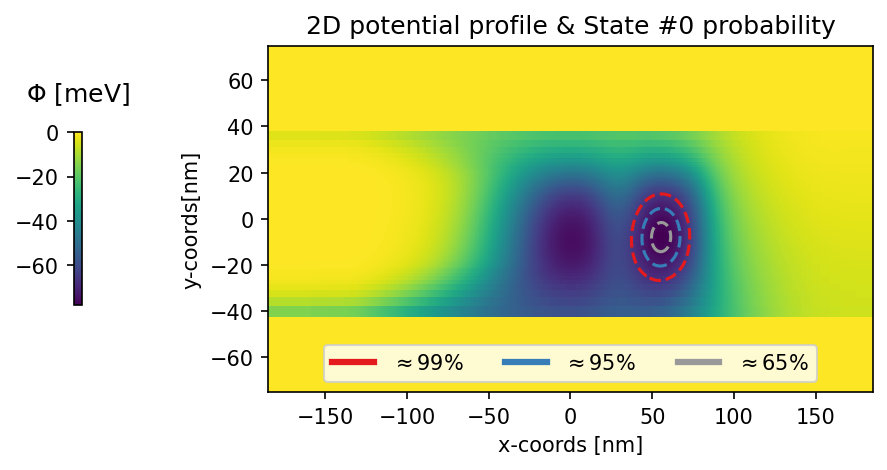

In [11]:
dotpair2.potential.plot(voltage_config, plot_units='meV', show_wf=True)

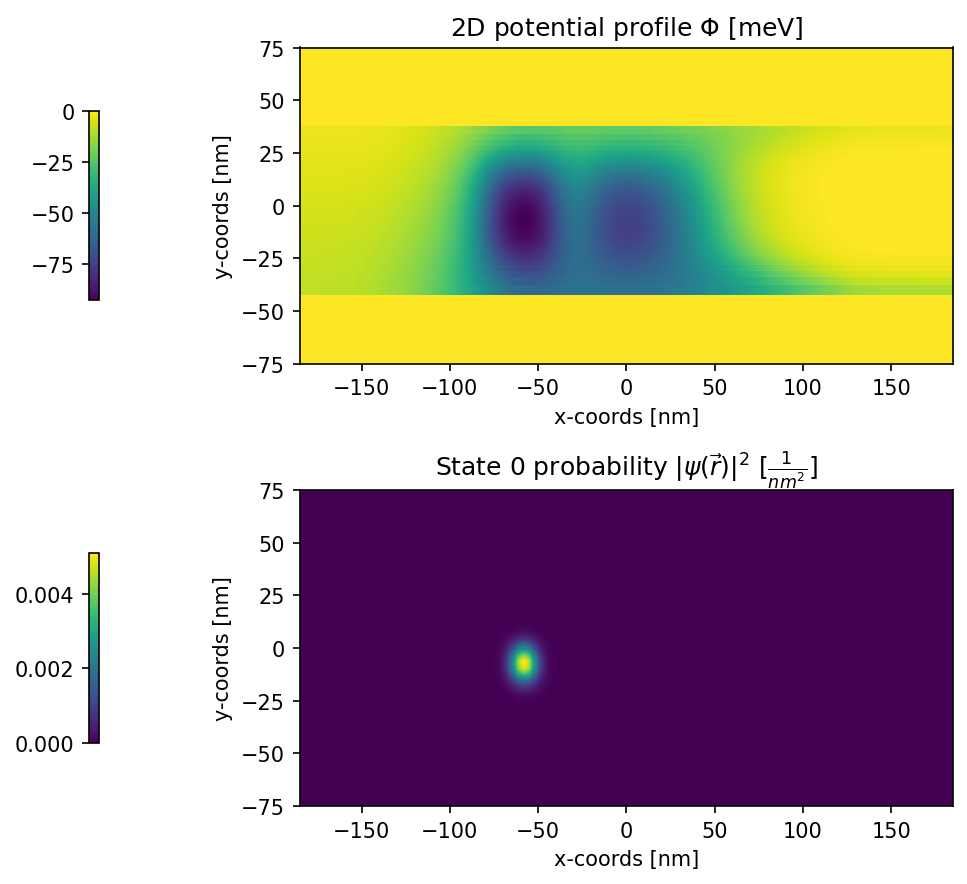

In [12]:
dotpair1.potential.plot(voltage_config, plot_units='meV', show_wf=True, overlay_ontop=False, figsize=(7,3))

All Dots objects preserve (**not for now**) information about the unmasked potential.
They can also be split more than once.

## 2 Evaluate effective parameters

For a specific control voltage configuration, the $g$-factor deviations and exchange couplings are determined for each dot or neighboring pair, respectively.

g-factor deviation for a single voltage vector

In [13]:
# higher voltage on the 2nd dot gives higher g-factor deviation
voltage_config = [0.3, 0.03, 0.21, 0.03, 0.24]

print('Exact values:\t',    dots.g_factors(voltage_config, exact=True))
print('Interpolated:\t',    dots.g_factors(voltage_config, exact=False))

g_factor evaluation: control vector=[0.3, 0.03, 0.21, 0.03, 0.24]: 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]
Exact values:	 [2.92330001e-05 1.14399576e-05 1.78048130e-05]
Interpolated:	 [2.91809219e-05 1.15698830e-05 1.77799351e-05]


g_factor evaluation: control vector=[0.35, 0.03, 0.21, 0.03, 0.24]: 100%|██████████| 6/6 [00:23<00:00,  3.90s/it]               


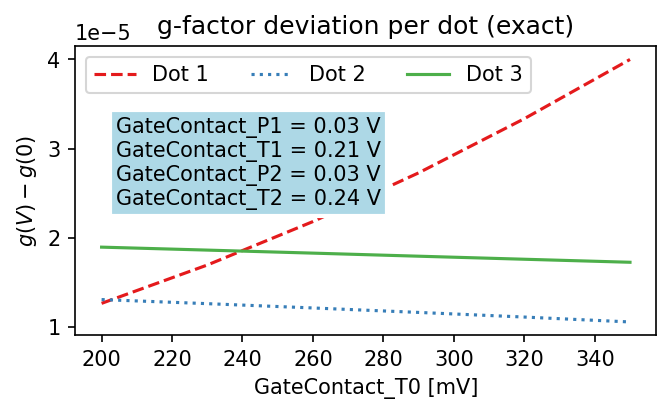

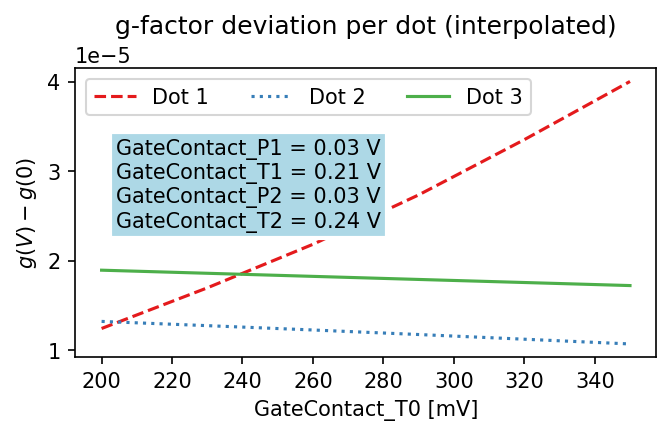

In [14]:
v1_vals = np.linspace(0.2, 0.35, 6)
v1_sweep =[[v, 0.03, 0.21, 0.03, 0.24] for v in v1_vals]
    
dots.plot(v1_sweep, param='gfactor', exact=True, dpi=150, ncol=3)
dots.plot(v1_sweep, param='gfactor', exact=False, dpi=150, ncol=3)

Exchange for a single voltage vector

In [15]:
# HM values are typically larger than HL
ex_hl_exact = dots.exchanges(voltage_config, method='hl', exact=True)
ex_hl_interp = dots.exchanges(voltage_config, method='hl', exact=False)

ex_hm_exact = dots.exchanges(voltage_config, method='hm', exact=True)
ex_hm_interp = dots.exchanges(voltage_config, method='hm', exact=False)

# convert values to neV
print(f'HL exchange: \t {(ex_hl_exact[0] / 1.6e-28):.5} neV (exact)\t'  
                f'{(ex_hl_interp[0] / 1.6e-28):.5} neV (interpolated)'  )
print(f'HM exchange: \t {(ex_hm_exact[0] / 1.6e-28):.5} neV (exact)\t'  
                f'{(ex_hm_interp[0] / 1.6e-28):.5} neV (interpolated)'  )

Exchange HL evaluation: control vector=[0.3, 0.03, 0.21, 0.03, 0.24]: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]
Exchange HM evaluation: control vector=[0.3, 0.03, 0.21, 0.03, 0.24]: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]
HL exchange: 	 1.5217e-08 neV (exact)	1.444e-08 neV (interpolated)
HM exchange: 	 9.8606e-08 neV (exact)	4.7436e-09 neV (interpolated)


Plotting exchange for a path through voltage state space.

Sweep of the first tunneling gate $W_1$.

Exchange HM evaluation: control vector=[0.2, 0.1, 0.2, 0.03, 0.2]: 100%|██████████| 10/10 [00:07<00:00,  1.33it/s]                


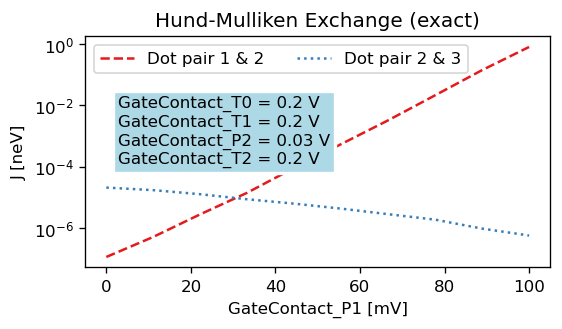

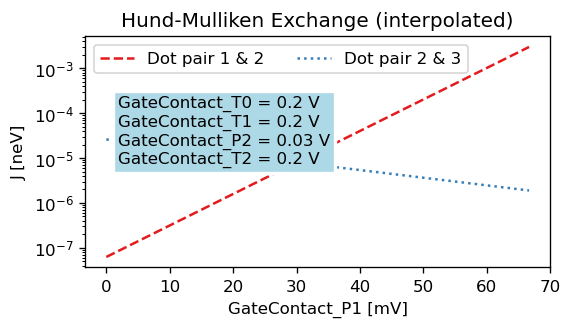

In [16]:
w1_vals = np.linspace(0.0,0.1,10)
voltage_configs = [[0.2, w1, 0.2, 0.03, 0.2] for w1 in w1_vals]

dots.plot(voltage_configs, param='hm', yscale='log', exact=True, plot_units='neV')
dots.plot(voltage_configs, param='hm', yscale='log', exact=False, plot_units='neV')

Sweep of the first plunger gate:

Exchange HM evaluation: control vector=[0.3, 0.05, 0.23, 0.03, 0.2]: 100%|██████████| 10/10 [00:07<00:00,  1.34it/s]               


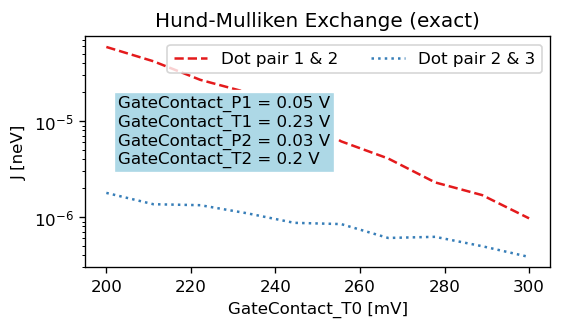

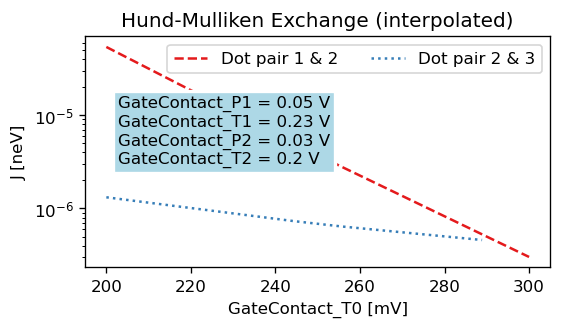

In [17]:
v12_vals = np.linspace(0.2,0.3,10)
voltage_configs = [[v12, 0.05, 0.23, 0.03, 0.2] for v12 in v12_vals]

dots.plot(voltage_configs, param='hm', yscale='log', exact=True, plot_units='neV')
dots.plot(voltage_configs, param='hm', yscale='log', exact=False, plot_units='neV')